In [84]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_fwf('auto-mpg.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [7]:
df.columns = ['mpg', 'cylinders', 'displacement',
              'horsepower', 'weight', 'acceleration',
              'model_year', 'origin', 'name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [8]:
df.shape

(398, 9)

In [9]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

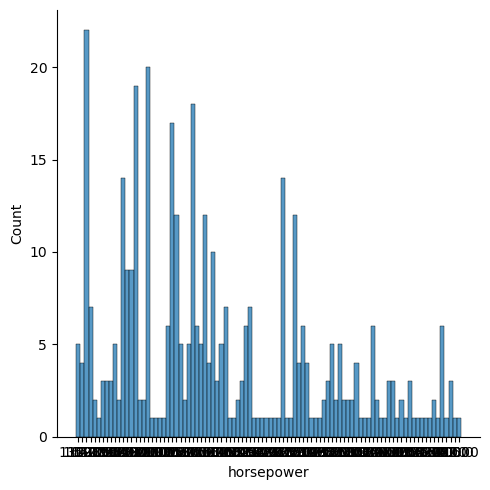

In [13]:
sns.displot(df['horsepower'])
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [20]:
df = df[df['horsepower'] != '?']

In [22]:
df['horsepower'] = df['horsepower'].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## Min-Max scaling

In [26]:
train, test = train_test_split(df, train_size = 0.7, random_state = 42)
train.shape, test.shape

((274, 9), (118, 9))

In [27]:
mm_scaler = MinMaxScaler()

In [32]:
# Got an error that the array was 1D and needs to be 2D, 
# so has to be double bracketed to put a list within a list

mm_scaler.fit(train[['horsepower']])

MinMaxScaler()

In [33]:
mm_horsepower = mm_scaler.transform(train[['horsepower']])

In [34]:
train['horsepower'].head()

110     94.0
17      85.0
320     92.0
24      90.0
128    100.0
Name: horsepower, dtype: float64

In [37]:
mm_horsepower[:5]

array([[0.25274725],
       [0.2032967 ],
       [0.24175824],
       [0.23076923],
       [0.28571429]])

In [40]:
mm_horsepower.max()

1.0000000000000002

In [41]:
train['horsepower'].max()

230.0

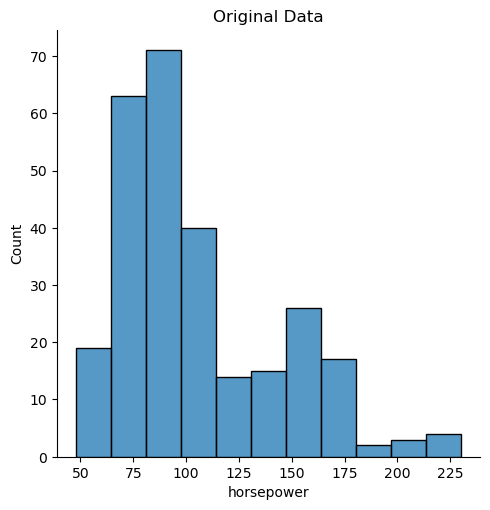

In [50]:
sns.displot(train['horsepower'])
plt.title('Original Data')
plt.show()

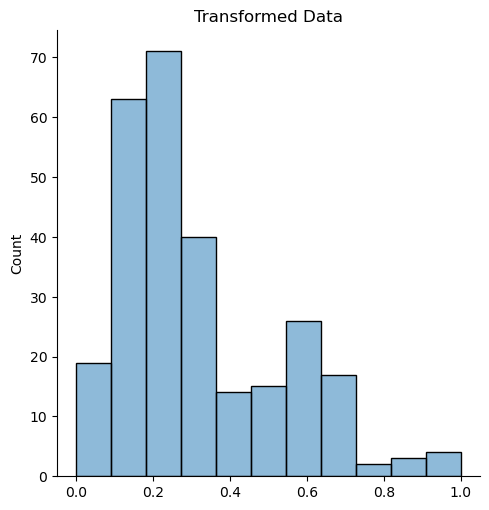

In [64]:
sns.displot(mm_horsepower, legend= None)
plt.title('Transformed Data')

plt.show()

## Standard Scaling

In [66]:
ss_scaler = StandardScaler()

In [69]:
ss_scaler.fit(train[['horsepower']])

StandardScaler()

In [72]:
ss_horsepower = ss_scaler.transform(train[['horsepower']])
ss_horsepower[:5]

array([[-0.28591285],
       [-0.52235185],
       [-0.33845485],
       [-0.39099685],
       [-0.12828685]])

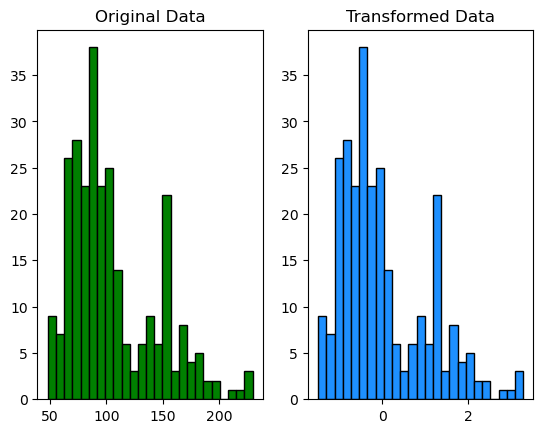

In [82]:
plt.subplot(121)
plt.hist(train['horsepower'], bins =25, ec = 'black', color= 'green')
plt.title('Original Data')

plt.subplot(122)
plt.hist(ss_horsepower, bins = 25, ec = 'black', color = 'dodgerblue')
plt.title('Transformed Data')

plt.show()

In [83]:
def compare_plots(transformed_data, original_data = train['horsepower']):
    
    plt.subplot(121)
    plt.hist(original_data, bins =25, ec = 'black', color= 'green')
    plt.title('Original Data')

    plt.subplot(122)
    plt.hist(transformed_data, bins = 25, ec = 'black')
    plt.title('Transformed Data')

    plt.show()

## Robust Scaling

In [85]:
rs_scaler = RobustScaler()

In [86]:
rs_scaler.fit(train[['horsepower']])

RobustScaler()

In [87]:
rs_horsepower = rs_scaler.transform(train[['horsepower']])

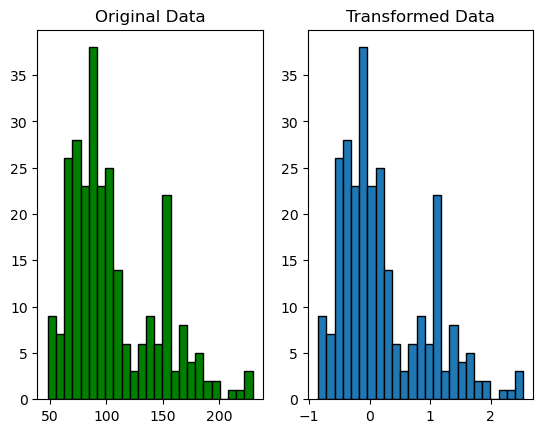

In [88]:
compare_plots(rs_horsepower)

In [89]:
rs_scaler.fit(train[['horsepower', 'weight']])

RobustScaler()

In [92]:
double_trouble = rs_scaler.transform(train[['horsepower', 'weight']])
double_trouble[:10]

array([[ 0.00930233, -0.31836291],
       [-0.15813953, -0.16769286],
       [-0.02790698, -0.27852227],
       [-0.06511628, -0.12350598],
       [ 0.12093023,  0.37486418],
       [-0.4744186 , -0.61463238],
       [ 0.02790698, -0.09018472],
       [-0.10232558, -0.05686346],
       [-0.77209302, -0.56754799],
       [-0.28837209, -0.45526983]])

In [96]:
pd.DataFrame(double_trouble, columns = ['horsepower_scaled', 'weight_scaled'])

,horsepower_scaled,weight_scaled
0,0.009302,-0.318363
1,-0.158140,-0.167693
2,-0.027907,-0.278522
3,-0.065116,-0.123506
4,0.120930,0.374864
...,...,...
269,1.051163,0.777617
270,0.120930,-0.021369
271,-0.158140,0.026440
272,-0.530233,-0.317639
